# Data Loading / Processing

In [0]:
import json
with open('train.json', 'r') as infile:
  data = json.load(infile)

In [2]:
print("Type of data: ",type(data))
print("Example data element: ",data[0])

Type of data:  <class 'list'>
Example data element:  {'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from nltk.stem import WordNetLemmatizer
import warnings 
warnings.filterwarnings(action = 'ignore') 
import re
nltk.download('punkt')
nltk.download('wordnet')
df = pd.read_json("train.json",encoding="utf-8", orient='records')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
df

id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]

# Data Overview

In [0]:
import matplotlib.pyplot as plt

In [6]:
df.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [0]:
cuisine_count = df.cuisine.value_counts()

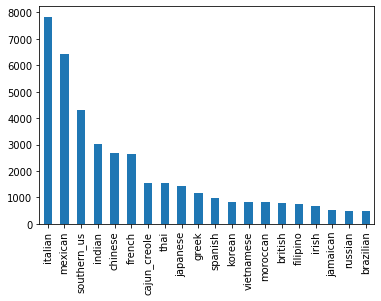

In [8]:
cuisine_count.plot(kind='bar')

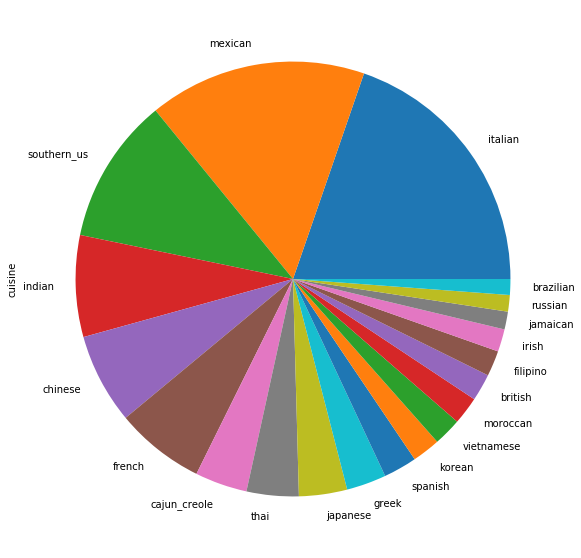

In [9]:
cuisine_count.plot.pie(y='mass', figsize=(10, 10))

## Word Cloud

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [0]:
# define stopwords
stopwords = set(STOPWORDS) 

#### Word cloud of all data

In [0]:
ingredients_name = ' '

# iterate through the csv file 
for val in df.ingredients: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        ingredients_name = ingredients_name + words + ' '

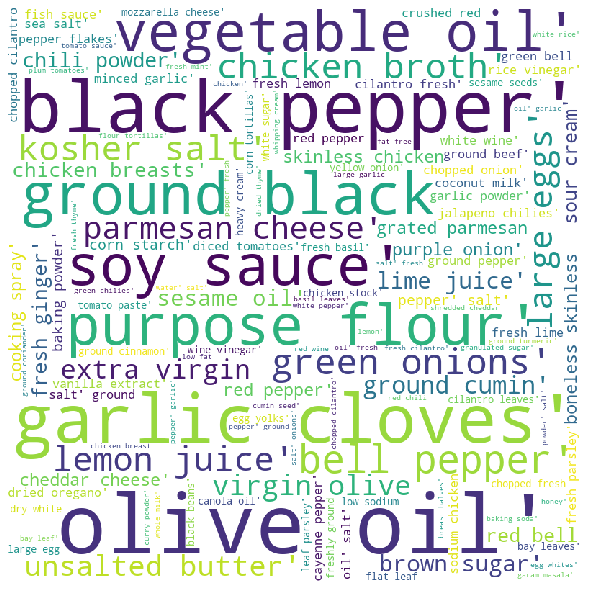

In [13]:
# generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(ingredients_name)

# plot the word cloud 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Word cloud of each cuisine

In [0]:
# word cloud function
def wordCloud(cuisine_type):
    ingredients_name = ' '
    # iterate through the csv file 
    for val in df.loc[df['cuisine'] == cuisine_type].ingredients: 
          
        # typecaste each val to string 
        val = str(val) 
      
        # split the value 
        tokens = val.split() 
          
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
              
        for words in tokens: 
            ingredients_name = ingredients_name + words + ' '

    # generate the word cloud
    wordcloud_greek = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(ingredients_name)

    # plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_greek) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

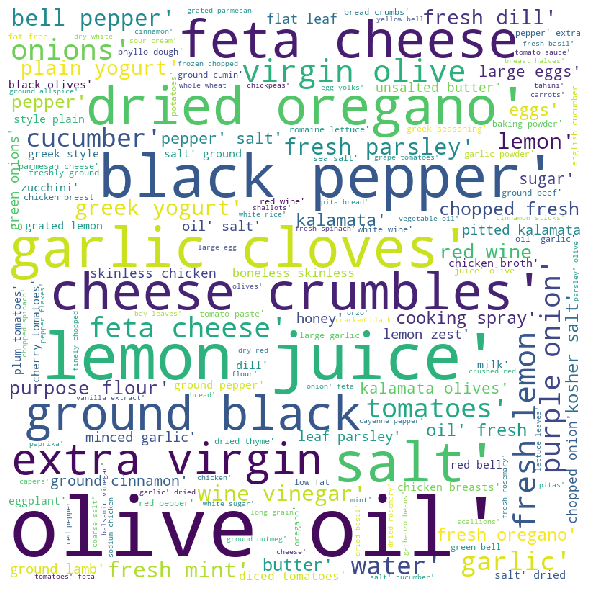

In [15]:
# greek
wordCloud_greek = wordCloud('greek')
wordCloud_greek

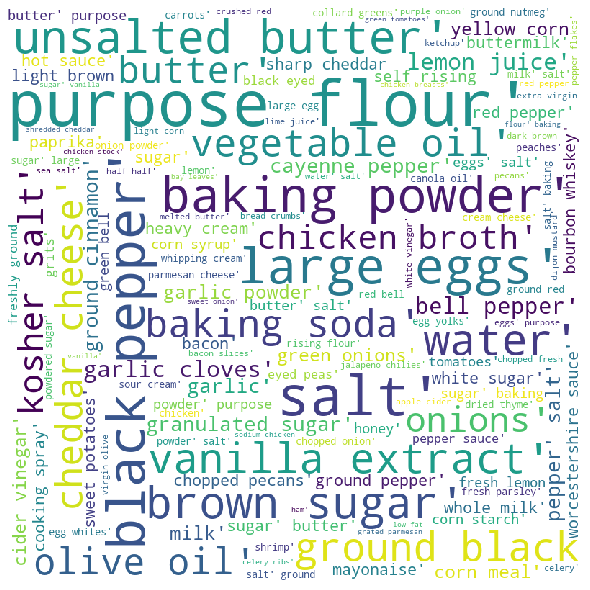

In [16]:
# southern_us
wordCloud_southern_us = wordCloud('southern_us')
wordCloud_southern_us

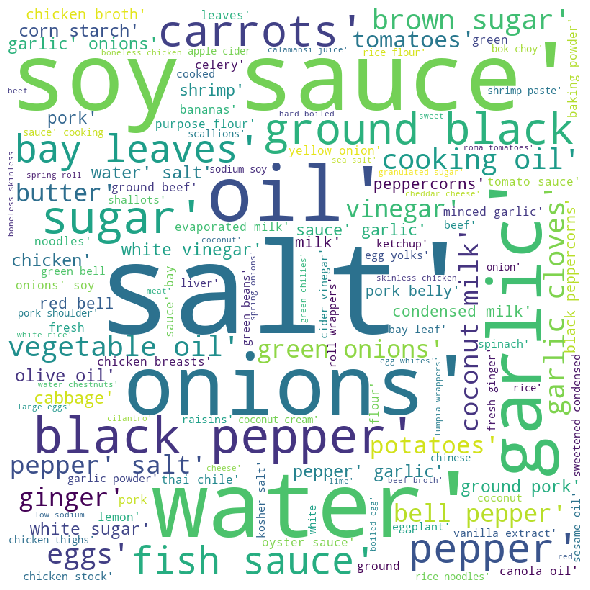

In [17]:
# filipino
wordCloud_filipino = wordCloud('filipino')
wordCloud_filipino

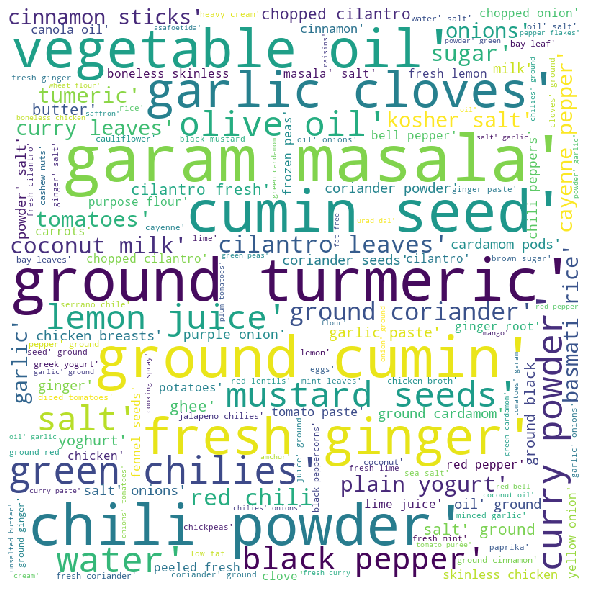

In [18]:
# indian
wordCloud_indian = wordCloud('indian')
wordCloud_indian

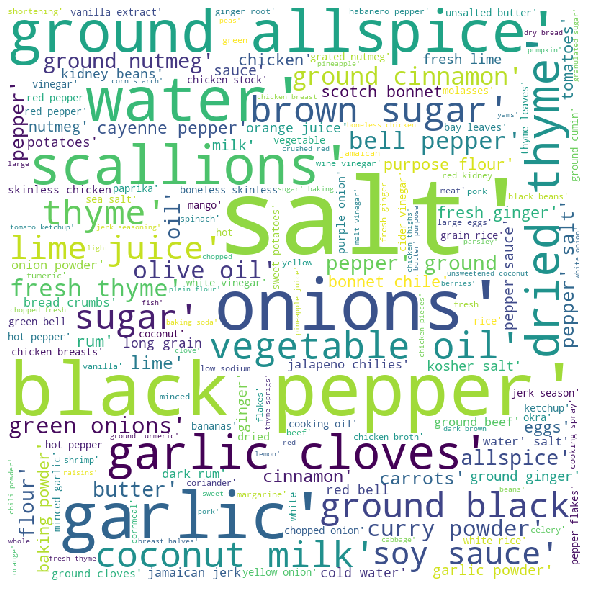

In [19]:
# jamaican
wordCloud_jamaican = wordCloud('jamaican')
wordCloud_jamaican

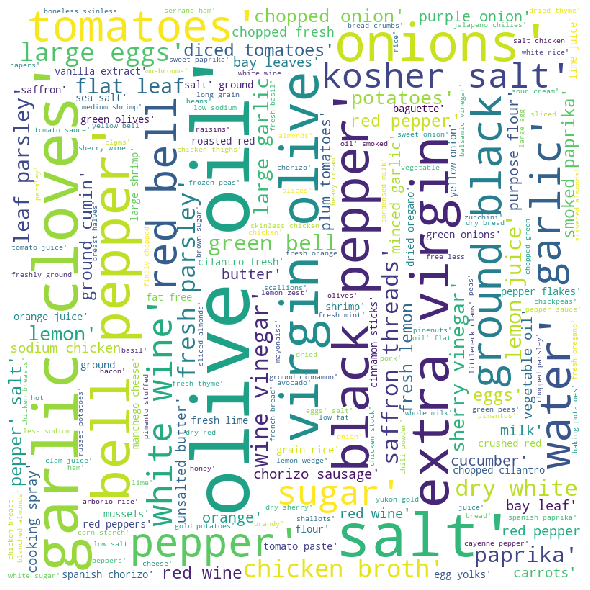

In [20]:
# spanish
wordCloud_spanish = wordCloud('spanish')
wordCloud_spanish

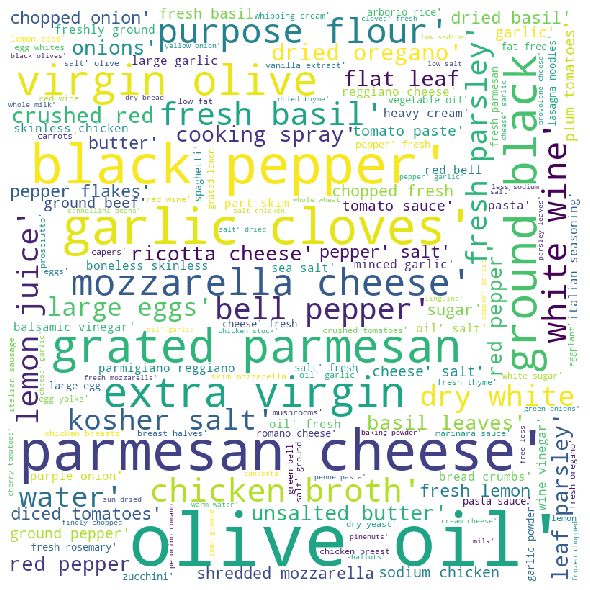

In [21]:
# italian
wordCloud_italian = wordCloud('italian')
wordCloud_italian

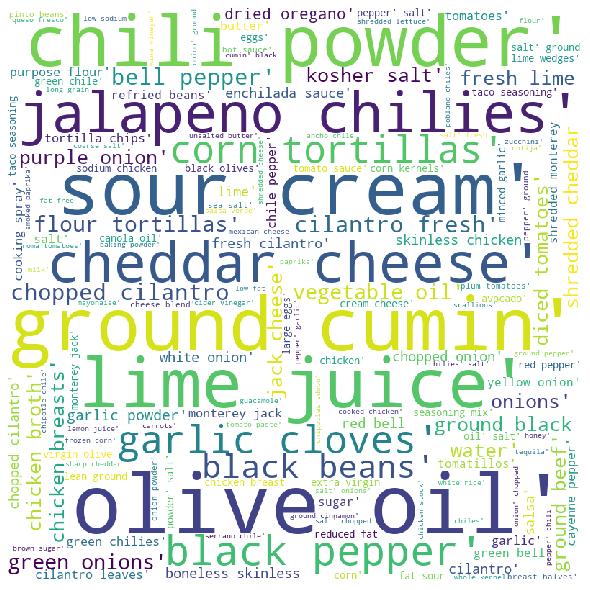

In [22]:
# mexican
wordCloud_mexican = wordCloud('mexican')
wordCloud_mexican

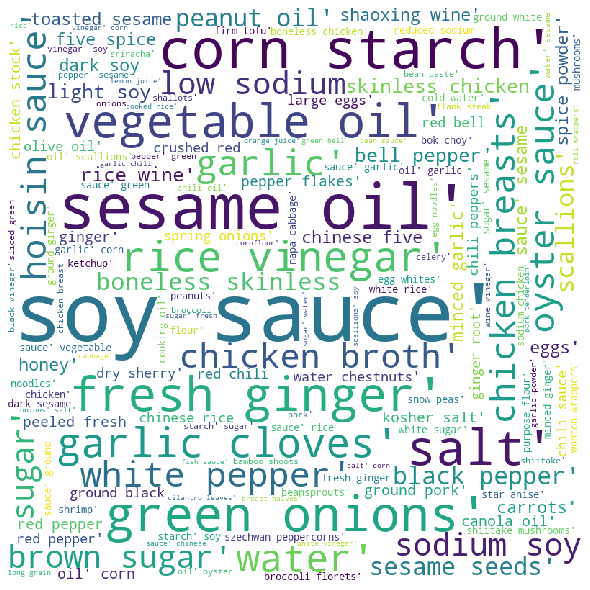

In [23]:
# chinese
wordCloud_chinese = wordCloud('chinese')
wordCloud_chinese

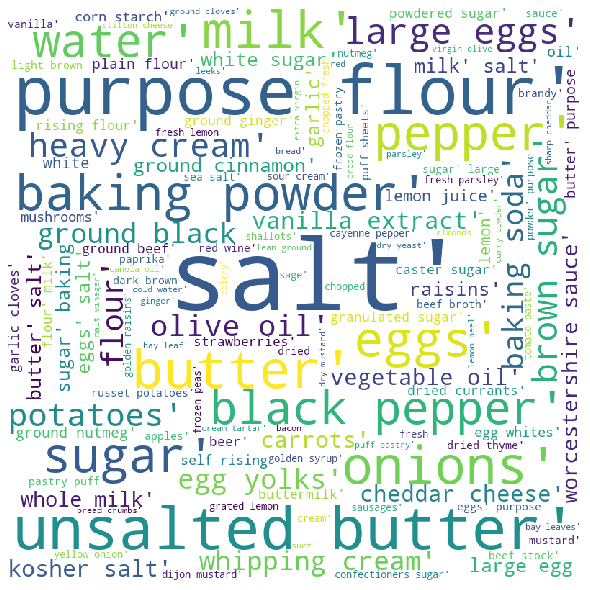

In [24]:
# british
wordCloud_british = wordCloud('british')
wordCloud_british

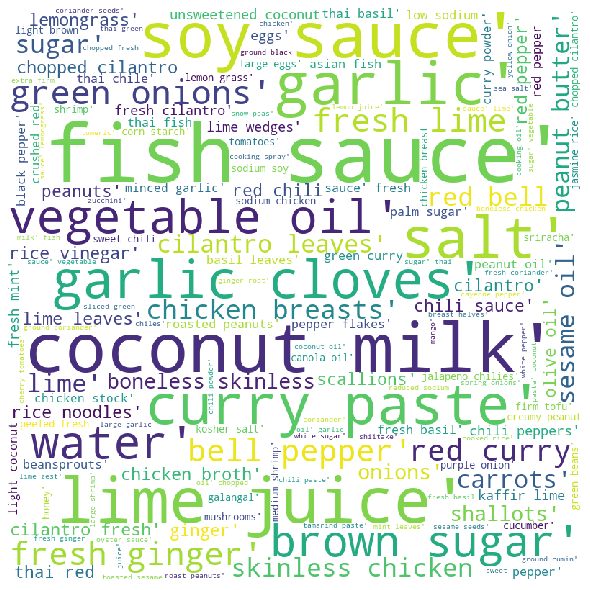

In [25]:
# thai
wordCloud_thai = wordCloud('thai')
wordCloud_thai

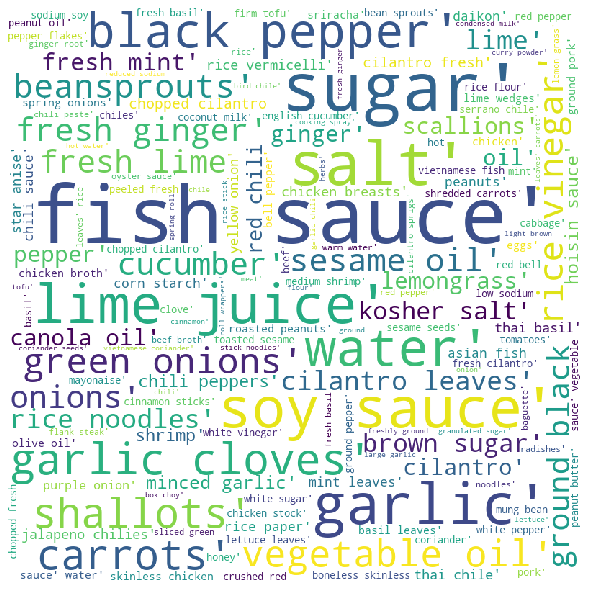

In [26]:
# vietnamese
wordCloud_vietnamese = wordCloud('vietnamese')
wordCloud_vietnamese

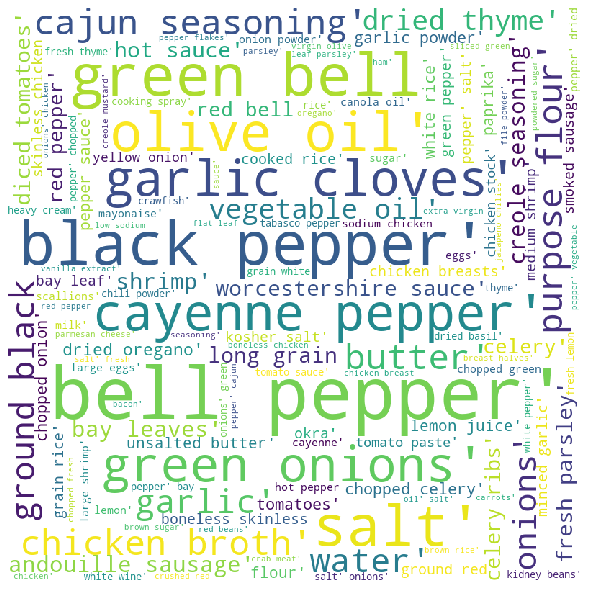

In [27]:
# cajun_creole
wordCloud_cajun_creole = wordCloud('cajun_creole')
wordCloud_cajun_creole

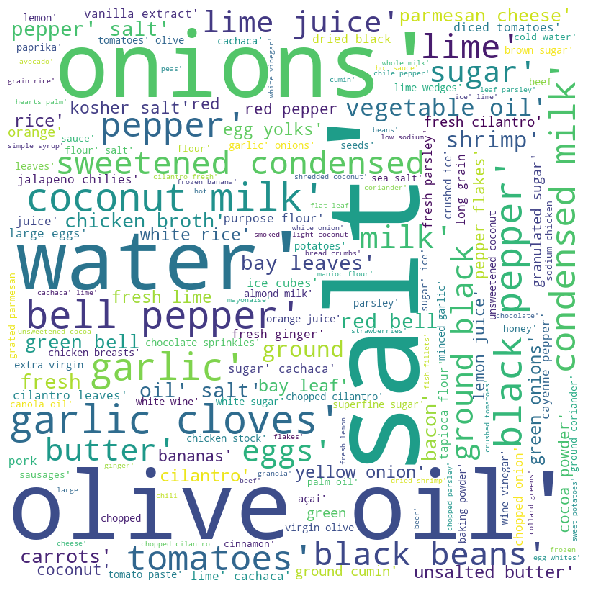

In [28]:
# brazilian
wordCloud_brazilian = wordCloud('brazilian')
wordCloud_brazilian

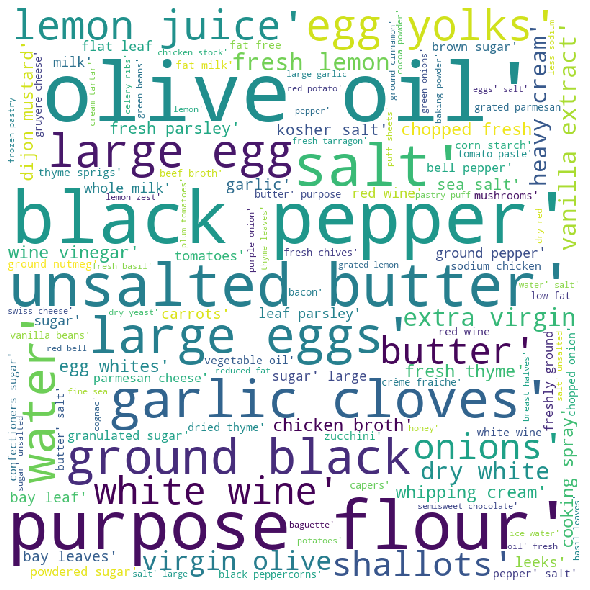

In [29]:
# french
wordCloud_french = wordCloud('french')
wordCloud_french

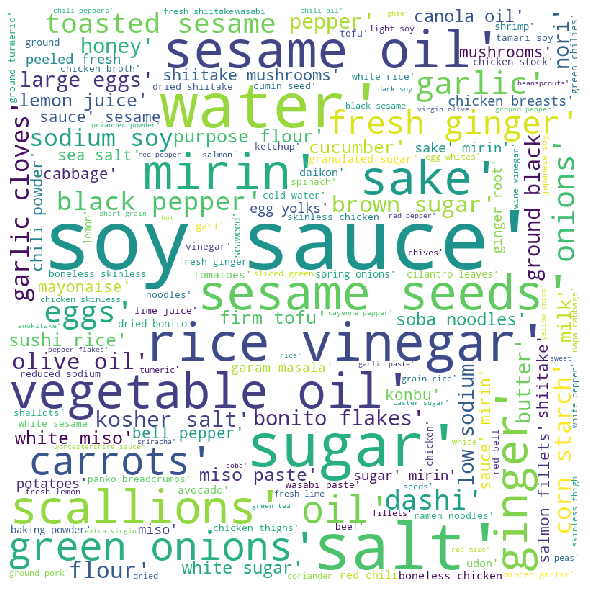

In [30]:
# japanese
wordCloud_japanese = wordCloud('japanese')
wordCloud_japanese

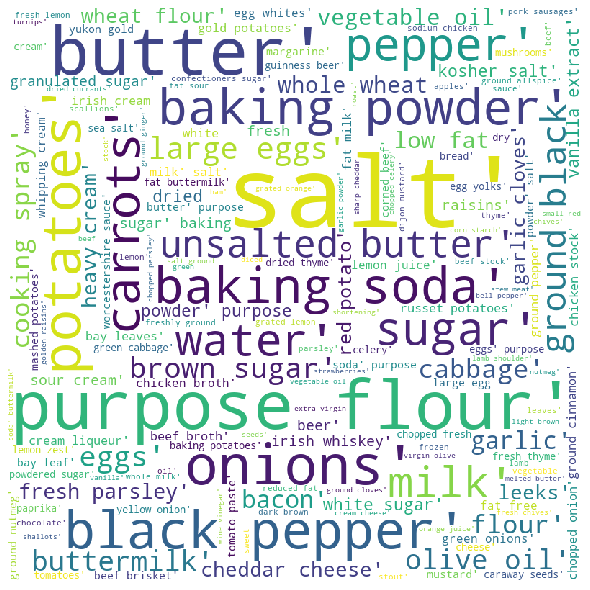

In [31]:
# irish
wordCloud_irish = wordCloud('irish')
wordCloud_irish

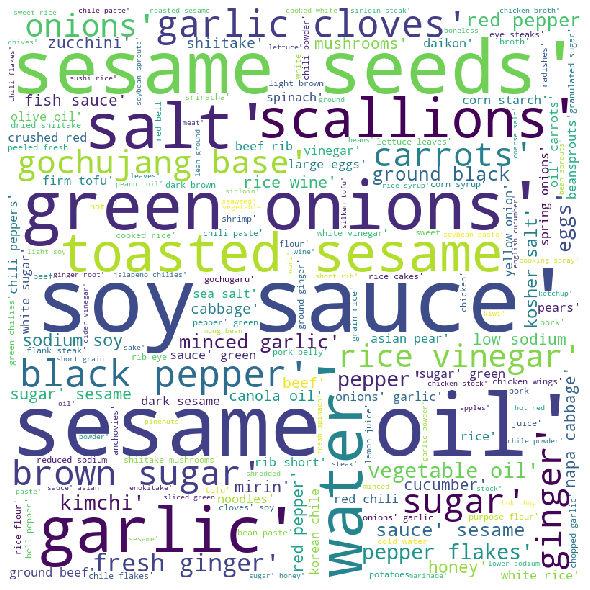

In [32]:
# korean
wordCloud_korean = wordCloud('korean')
wordCloud_korean

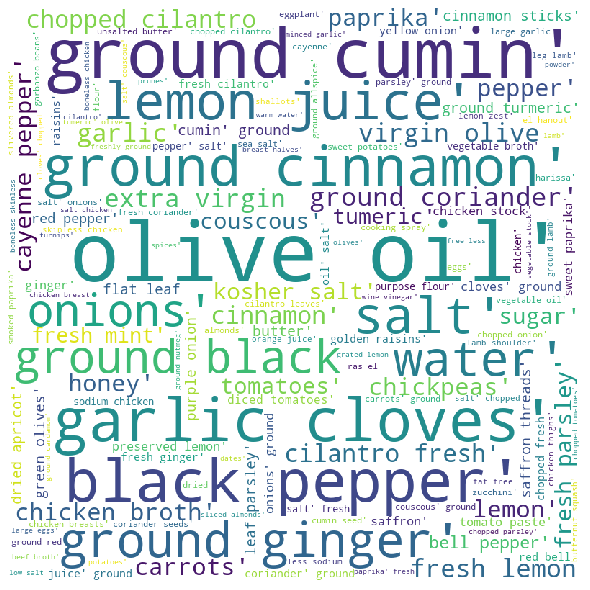

In [33]:
# moroccan
wordCloud_moroccan = wordCloud('moroccan')
wordCloud_moroccan

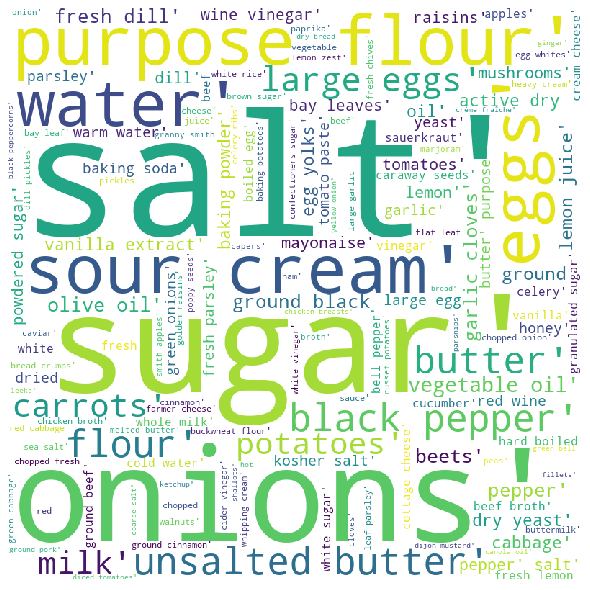

In [34]:
# russian
wordCloud_russian = wordCloud('russian')
wordCloud_russian

# Nature Language Processing

In [0]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df['ingredients_separate'] = [','.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df['ingredients']]

In [0]:
df

id  ...                               ingredients_separate
0      10259  ...  romaine lettuce,black olives,grape tomatoes,ga...
1      25693  ...  plain flour,ground pepper,salt,tomato,ground b...
2      20130  ...  egg,pepper,salt,mayonaise,cooking oil,green ch...
3      22213  ...                     water,vegetable oil,wheat,salt
4      13162  ...  black pepper,shallot,cornflour,cayenne pepper,...
...      ...  ...                                                ...
39769  29109  ...  light brown sugar,granulated sugar,butter,warm...
39770  11462  ...  KRAFT Zesty Italian Dressing,purple onion,broc...
39771   2238  ...  egg,citrus fruit,raisin,sourdough starter,flou...
39772  41882  ...  boneless chicken skinless thigh,minced garlic,...
39773   2362  ...  green chile,jalapeno chilies,onion,ground blac...

[39774 rows x 4 columns]

### Word2Vec

In [0]:
# Extract ingredients column from the original data
word2vec_train_data = list(df['ingredients'])
# Train the customized word2vec model
w2v_model_general = Word2Vec(word2vec_train_data, min_count=1)
word_lib_general = list(w2v_model_general.wv.vocab)

# Separate ingredients into single words
# word2vec_train_data1 = list(df['ingredients_separate'])
# w2v_model_specific = Word2Vec(word2vec_train_data1, min_count=1)
# word_lib_specific = list(w2v_model_specific.wv.vocab)

#### Cosine Similarity (cuisine) MDS Plot

In [0]:
def cosine_similarity(x, y):
  return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

def similarity_matrix(data):
  # Construct similarity matrix of cuisine
  sim_matrix = np.zeros(shape=(len(data), len(data)))
  for i in range(len(data)):
    sim_matrix[i][i] = 1
    for j in range(0, i):
      sim_matrix[i][j] = cosine_similarity(data[i], data[j])
      sim_matrix[j][i] = sim_matrix[i][j]
  return sim_matrix

# Plotting MDS plot
from sklearn import manifold
import matplotlib.pyplot as plt
def plotMDS(dissimilarity_matrix, name_list, fig_size=(12,8)):
  seed = np.random.RandomState(seed=3)
  mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed, dissimilarity="precomputed", n_jobs=1)
  results = mds.fit(dissimilarity_matrix)
  coords = results.embedding_
  fig = plt.figure(figsize=fig_size)
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')
  for label, x, y in zip(name_list, coords[:, 0], coords[:, 1]):
      plt.annotate(label, xy = (x, y), xytext = (-30, 30), textcoords = 'offset points', ha = 'right', va = 'bottom',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
  plt.show()

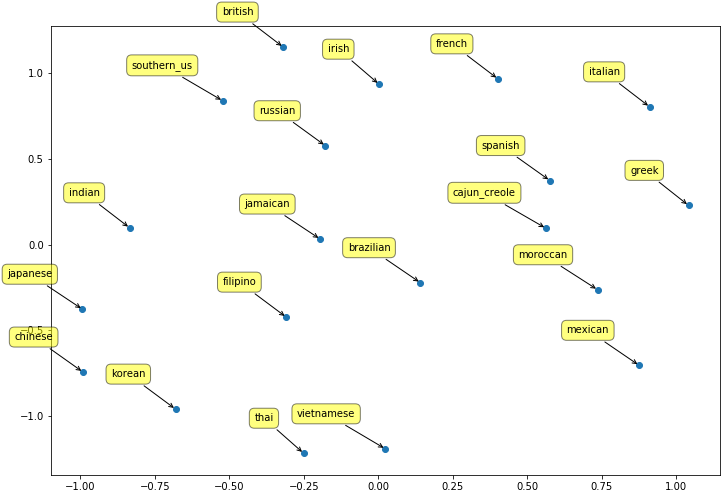

In [0]:
import numpy as np
cuisine_vec = list()
for cuisine in df['ingredients']:
  cuisine_vector = np.copy(w2v_model_general[cuisine[0]])
  for ingredient in cuisine[1:]:
    cuisine_vector += w2v_model_general[ingredient]
  cuisine_vec.append(cuisine_vector)
df['cuisine_vec'] = cuisine_vec

cuisine_kind = df['cuisine'].unique()
type_vect = list()
for cuisine_type in cuisine_kind:
  type_vect.append(np.sum(df['cuisine_vec'][df['cuisine']==cuisine_type]))

type_similarity = similarity_matrix(type_vect)
# Calculating the dissimilarity matrix which is the input for plotting MDS plot
type_dissim = 1.0/type_similarity
for i in range(len(type_dissim)):
  type_dissim[i][i] = 0

# Ploting MDS.
type_dissim_df = pd.DataFrame(type_dissim, columns=cuisine_kind, index=cuisine_kind)
plotMDS(type_dissim_df, cuisine_kind)

#### Cosine Similarity (ingredients) Word Vector Plot

In [0]:
## SPACE FOR MOMO
def Dissimilarity(data):
  similar_mat = similarity_matrix(data)
  dissim_mat = 1.0/similar_mat
  for i in range(len(dissim_mat)):
    dissim_mat[i][i] = 0
  return dissim_mat

def closestBar(result, width=0.6):
  plt.rcdefaults()
  fig, ax = plt.subplots()
  colors = ['aqua','aquamarine','lightgreen','yellowgreen','lightblue','lavender','plum','orchid','pink','salmon']
  # Example data
  ingredient = [item[0] for item in result]
  y_pos = np.arange(len(ingredient))
  sims = [item[1] for item in result]

  rects = ax.barh(y_pos, sims, align='center', color=colors)
  for rect in rects:
    plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(), '%.4f'%rect.get_width(),ha='center',va='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(ingredient)
  ax.invert_yaxis()  # labels read top-to-bottom
  ax.set_xlabel('Similarity')
  ax.set_title('Most similar words')

  plt.show()

import math
def plotMDS1(dists, items, figsize=(8, 8)): 
  mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0, dissimilarity="precomputed", n_jobs=1)
  coords = mds.fit(dists).embedding_ 
  plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
  plt.tick_params(
      axis='both',          
      which='both',      
      bottom=False,      
      left=False,         
      labelbottom=False,
      labelleft=False)

  lim = max([abs(x) for x in coords[:,0] + coords[:,1]])
  plt.xlim([-lim,lim])
  plt.ylim([-lim,lim])
  plt.scatter(coords[2:,0], coords[2:,1])
  plt.scatter(coords[0:1,0], coords[0:1,1], color='black')
  plt.scatter(coords[1:2,0], coords[1:2,1], color='orange')
  
  for item, x, y in zip(items[2:], coords[2:,0], coords[2:,1]):
    plt.annotate(item, xy=(x,y), xytext=(-2, 2), textcoords='offset points', 
            ha='right', va='bottom', color='purple', fontsize=14 )

  x0=coords[0,0]
  y0=coords[0,1]
  plt.annotate(words[0], xy=(x0, y0), xytext=(-2, 2), textcoords='offset points', 
                ha='right', va='bottom', color='black', fontsize=16 )
  
  x1=coords[1,0]
  y1=coords[1,1]
  plt.annotate(items[1], xy=(x1, y1), xytext=(-2, 2), textcoords='offset points', 
                ha='right', va='bottom', color='orange', fontsize=14 )

  ax = plt.gca()
  
  r = math.sqrt((x1-x0)**2 + (y1-y0)**2 )
  
  circle = plt.Circle((x0, y0), r, color='orange', fill=False)
  ax.add_artist(circle)

  plt.show()

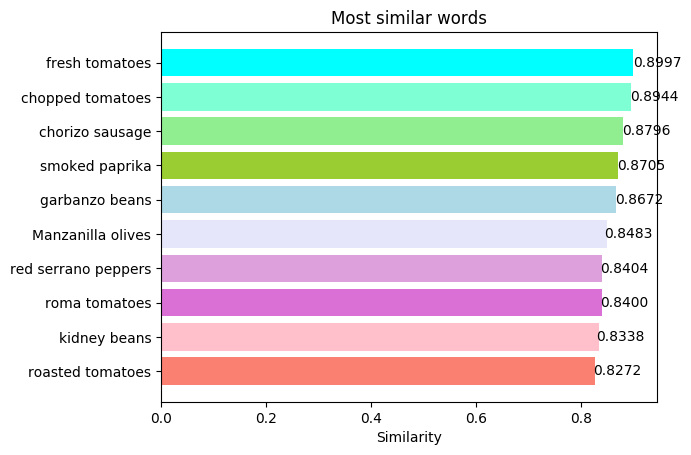

In [0]:
selected_ing = 'tomatoes'
top10 = w2v_model_general.similar_by_word('tomatoes', topn=10, restrict_vocab=None)
losestBar(top10)

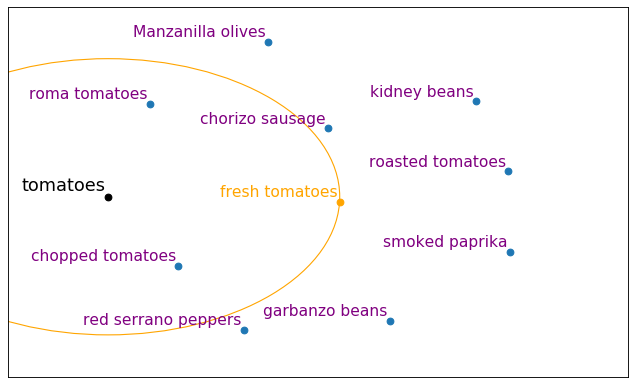

In [0]:
words = [selected_ing]+[item[0] for item in top10] 
similar_word_vec = [w2v_model_general[item] for item in words]
dissimilar_word_mat = Dissimilarity(similar_word_vec)
plotMDS1(dissimilar_word_mat, words, figsize=(10,6))

### Topic Modeling & LDA

In [0]:
#Topic modeling
from gensim import models, corpora

In [0]:
ingredients_data = []
for text in df['ingredients']:
    # for w in text:
    ingredients_data.append(text)

#ingredients_data

In [0]:
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(ingredients_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in ingredients_data]

In [0]:
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=20, id2word=dictionary)

In [0]:
print("LDA Model:")
for idx in range(20):
    # Print the first 20 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 20))

LDA Model:
Topic #0: 0.055*"fish sauce" + 0.041*"coconut milk" + 0.037*"shallots" + 0.026*"lemongrass" + 0.026*"lime juice" + 0.023*"lime" + 0.022*"enchilada sauce" + 0.022*"sugar" + 0.021*"cilantro leaves" + 0.020*"fresh lime juice" + 0.015*"asian fish sauce" + 0.014*"garlic" + 0.014*"water" + 0.014*"thai basil" + 0.014*"fresh coriander" + 0.013*"cream" + 0.013*"mint leaves" + 0.013*"chiles" + 0.012*"lime wedges" + 0.012*"boneless chicken breast"
Topic #1: 0.064*"salt" + 0.041*"onions" + 0.039*"cumin seed" + 0.037*"garam masala" + 0.034*"ground turmeric" + 0.033*"green chilies" + 0.030*"oil" + 0.027*"tomatoes" + 0.027*"ginger" + 0.025*"chili powder" + 0.023*"water" + 0.022*"tumeric" + 0.020*"garlic" + 0.019*"coriander" + 0.017*"ground cumin" + 0.015*"cilantro leaves" + 0.013*"lemon juice" + 0.013*"mustard seeds" + 0.012*"vegetable oil" + 0.011*"garlic cloves"
Topic #2: 0.051*"garlic powder" + 0.047*"salt" + 0.031*"dried oregano" + 0.028*"onions" + 0.027*"ground black pepper" + 0.026*"

# Model Prediction & Machine Learning

### 100+ features vectorize

#### Logistic Regression

In [0]:
LR_w2v = LogisticRegression()
X = np.array(cuisine_vec)
y = df['cuisine']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
LR_w2v.fit(X_train, y_train)
print("Accuracy: ", accuracy_score(y_val, LR_w2v.predict(X_val)))

Accuracy:  0.6671415402664879


In [0]:
print("Accuracy: ", accuracy_score(y_train, LR_w2v.predict(X_train)))

Accuracy:  0.6769512589346647


#### Random Forest

In [0]:
X = np.array(cuisine_vec)

In [0]:
y = df['cuisine']

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=1)
# rf.fit(X_train, y_train)
param_grid = {
    'max_depth' : [i for i in range(100,200,20)],
    'n_estimators' : [i for i in range(100,500,100)]}
grid = GridSearchCV(estimator = rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
accuracy_score(y_val, grid.predict(X_val))
# accuracy_score(y_val, rf.predict(X_val))

0.6494594821084387

### 6000+ features vectorize

In [0]:
df = pd.read_json("train.json",encoding="utf-8", orient='records')
df = df.drop("id",axis=1)

# unique ingredients set
ingredients=[]
for i in range(len(df)):
    for j in df["ingredients"][i]:
        ingredients.append(j)
ingredients = list(set(ingredients))
len(ingredients)

# vectorize the words(ingredients)
for i in ingredients:
    df[i] = 0

for i in range(len(df)):
    for j in df["ingredients"][i]:
        df[j][i] += 1

# one-hot encoding for the cuisine
# df = pd.get_dummies(df,columns=["cuisine"])

In [0]:
from sklearn.model_selection import train_test_split
y = df["cuisine"]
X = df.drop(["cuisine","ingredients"],axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

#### Logistic Regression

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val,lr.predict(X_val)))

0.7743233051202547


In [0]:
lr.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [0]:
pd.DataFrame(lr.coef_, index=lr.classes_, columns=ingredients)

dried soba  italian plum tomatoes  ...  salmon fillets  ground fennel
brazilian      -0.000351               0.682347  ...        0.806841      -0.029226
british        -0.000457              -0.131543  ...        0.190666      -0.022592
cajun_creole   -0.005058              -0.226587  ...       -0.172035      -0.136065
chinese        -0.079016              -0.083085  ...       -1.278358      -0.032723
filipino       -0.008465              -0.084770  ...        0.735382      -0.049541
french         -0.000397              -0.334444  ...        1.141891      -0.022022
greek          -0.002659               0.457380  ...       -1.155613      -0.027615
indian         -0.005563              -0.174885  ...        0.215626       0.021761
irish          -0.001990              -0.140649  ...       -0.093180      -0.013215
italian        -0.002336               0.712184  ...       -1.228259       0.293531
jamaican       -0.006199              -0.040312  ...       -0.223770      -0.031608
japanese        0.377529              -0.039365  ...        1.441831       0.382351
korean         -0.138397              -0.051937  ...       -0.489891      -0.006345
mexican        -0.000979              -0.163649  ...       -1.361724      -0.136487
moroccan       -0.004255              -0.231435  ...        0.741326      -0.018084
russian        -0.000746              -0.041494  ...        1.317526      -0.013777
southern_us    -0.002916              -0.245704  ...       -1.001900      -0.037977
spanish        -0.001777               0.101776  ...       -0.085920      -0.043086
thai           -0.226674              -0.136442  ...        0.137493      -0.008662
vietnamese     -0.019926              -0.052198  ...       -0.742038      -0.007921

[20 rows x 6714 columns]

In [0]:
import numpy as np
for it in range(len(lr.classes_)):
    sorted_ind = np.argsort(lr.coef_[it])
    print("------ Weights importance for ", lr.classes_[it],"------")
    for i in range(1, 11):
        print(ingredients[sorted_ind[-i]], " with weights ", lr.coef_[it][sorted_ind[-i]])
    print("")

------ Weights importance for  brazilian ------
cachaca  with weights  5.449643221969179
manioc flour  with weights  3.599558496137029
tapioca flour  with weights  3.112503960576483
sweetened condensed milk  with weights  3.106926186437871
dried black beans  with weights  2.966461202753759
tapioca starch  with weights  2.7767407702576072
hearts of palm  with weights  2.581053081582175
chocolate sprinkles  with weights  2.3933710174670684
açai  with weights  2.2453540559101293
black beans  with weights  2.171307305234213

------ Weights importance for  british ------
stilton  with weights  3.4039011160255184
stilton cheese  with weights  3.260524331351025
mincemeat  with weights  2.7546392156251014
marmite  with weights  2.3845358786374584
double cream  with weights  2.340550694456936
suet  with weights  2.2140315641868105
raspberry jam  with weights  2.1434349745040193
strawberry jam  with weights  2.035611189934053
beef drippings  with weights  2.0318354849493208
beef tenderloin  with

##### Test with Kaggle Submission

In [0]:
#Logistic Regression
df_test = pd.read_json("test.json",encoding="utf-8", orient='records')
df_test.head()

id                                        ingredients
0  18009  [baking powder, eggs, all-purpose flour, raisi...
1  28583  [sugar, egg yolks, corn starch, cream of tarta...
2  41580  [sausage links, fennel bulb, fronds, olive oil...
3  29752  [meat cuts, file powder, smoked sausage, okra,...
4  35687  [ground black pepper, salt, sausage casings, l...

In [0]:
# vectorize the words(ingredients)
# for i in ingredients:
#     df_test[i] = 0

for i in range(len(df_test)):
    for j in df_test["ingredients"][i]:
        if j in ingredients:
            df_test[j][i] += 1

In [0]:
df_test.columns

Index(['id', 'ingredients', 'seasoning', 'pepperoni slices', 'shanks',
       'long green pepper', 'corn chips', 'broccoli romanesco',
       'sesame chili oil', 'fresh tomatoes',
       ...
       'low-fat milk', 'Thai eggplants', 'light tuna packed in olive oil',
       'chourico', 'tenderloin roast', 'frozen peaches', 'do chua',
       'pepper jack', 'meat loaf mixture', 'jumbo macaroni shells'],
      dtype='object', length=6716)

In [0]:
X_test = df_test[df.columns[2:]]

In [0]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_test = lr.predict(X_test)

In [0]:
solution = pd.DataFrame({"id":df_test.id, "cuisine":y_test})
solution.to_csv("ingredient.csv", index = False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
param_grid = {
    'max_depth' : [i for i in range(40,200,20)],
    'min_samples_split' : [2**i for i in range(5,15,5)]
}
grid = GridSearchCV(estimator = rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
accuracy_score(grid.predict(X_val),y_val)

#### LGBM

In [0]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
lgbm_model = LGBMClassifier()
lgbm_model.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [0]:
params = {
    'max_depth' : [i for i in range(100,200,20)],
    # 'min_samples_split' : [2**i for i in range(5,15,5)],
    'n_estimators' : [i for i in range(100,500,100)],
    'boosting_type': ['goss']
}

params2 = {
    'max_depth': [100],
    'n_estimators' : [100]
    'boosting_type' : ['goss']
}

In [0]:
lgbm_cv = GridSearchCV(estimator = lgbm_model, param_grid= params2, cv = 5, verbose=2, refit=True)

In [0]:
lgbm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] boosting_type=goss, max_depth=100, n_estimators=100 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=100, total=  17.1s
[CV] boosting_type=goss, max_depth=100, n_estimators=100 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[CV]  boosting_type=goss, max_depth=100, n_estimators=100, total=  17.0s
[CV] boosting_type=goss, max_depth=100, n_estimators=100 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=100, total=  17.0s
[CV] boosting_type=goss, max_depth=100, n_estimators=100 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=100, total=  17.1s
[CV] boosting_type=goss, max_depth=100, n_estimators=100 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=100, total=  16.9s
[CV] boosting_type=goss, max_depth=100, n_estimators=200 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=200, total=  26.8s
[CV] boosting_type=goss, max_depth=100, n_estimators=200 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=200, total=  27.4s
[CV] boosting_type=goss, max_depth=100, n_estimators=200 .............
[CV]  boosting_type=goss, max_depth=100, n_estimators=200, total=  28.0s
[CV] boosting_type=goss, max_depth=100, n_estimators=200 ......

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 54.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'boosting_type': ['goss'],
                         'max_de

In [0]:
accuracy_score(lgbm_cv.predict(X_val),y_val)

0.7396295985921394

### 3000+ features vectorize


In [0]:
# seperate words of ingredients into one word
df_ingredients_text = df["ingredients"].apply(lambda x: ' '.join(w.lower() for i in x)).str.replace('[^\w\s]','')

# Encode labels
lb = LabelEncoder()
df_y = lb.fit_transform(df.cuisine)

# TF-IDF transform(X-variables)
vectorizer = TfidfVectorizer()
vectorizer.fit(df_ingredients_text)
df_x = vectorizer.transform(df_ingredients_text)

# X-variable column names
X_colname=list(vectorizer.vocabulary_.keys())

# label classes
label_name = list(lb.classes_)

# one-hot encoding for the cuisine
y_dummy = pd.get_dummies(df["cuisine"])

# Train and validation set split
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.1, random_state=1)
y_train_dummy, y_val_dummy = train_test_split(y_dummy, test_size=0.1, random_state=1)


In [0]:
# data dimension
print(X_train.shape)
print(X_val.shape)

(35796, 3073)
(3978, 3073)


#### Random Forest

In [0]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=600,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
# Accuracy
accuracy_score(rf.predict(X_val),y_val)

0.7554047259929613

#### XGBoost

In [0]:
# tuning hyper-parameters
param1 = {
    'max_depth':[2,3,4],
#     'min_child_weight':[2**i for i in range(5,15,5)],#
#     'gamma':[i/10.0 for i in range(0,5)],#
#     'subsample':[i/10.0 for i in range(6,10)],#
#     'colsample_bytree':[i/10.0 for i in range(6,10)],#
#     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],#
    'learning_rate':[0.1,0.3]#
}
xgbgs2 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    objective='multi:softprob',
    num_class=20,
    seed = 1),
    param_grid = param1,
    scoring='accuracy',
    cv=3)
xgbgs2.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=20,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=1, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [2, 3, 4]},
             pre_dispatch='2*n_jobs', ref

In [0]:
accuracy_score(xgbgs2.predict(X_val),y_val)

0.7772750125691302

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# model prediction
y_pred = xgbgs2.predict_proba(X_val)

n_classes=20
fpr = dict()
tpr = dict()
roc_auc = dict()
# calculate false positive rate, true positive rate, and auc score for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_dummy.iloc[:,i], y_pred[:,i])
    roc_auc[i] = roc_auc_score(y_val_dummy.iloc[:,i], y_pred[:,i])

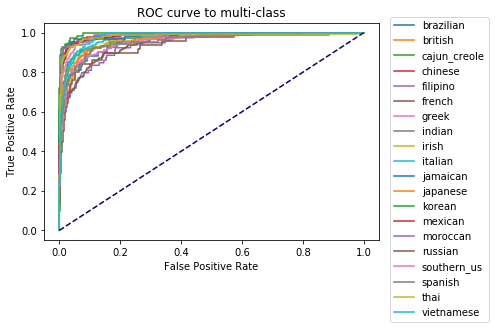

In [0]:
# ROC curve for each class
for i in range(20):
    plt.plot(fpr[i],tpr[i])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC curve to multi-class')
plt.legend(y_dummy.columns,loc='upper center', bbox_to_anchor=(1.18, 1.05))
plt.show()

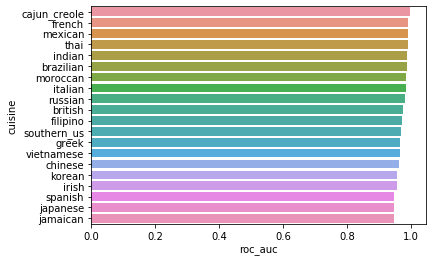

In [0]:
import seaborn as sns
# AUC score for each class
df_auc = pd.DataFrame({"cuisine":list(df["cuisine"].drop_duplicates()),"roc_auc":list(roc_auc.values())})
df_auc = df_auc.sort_values(by="roc_auc",ascending=False)
sns.barplot(x="roc_auc",y="cuisine",data=df_auc)


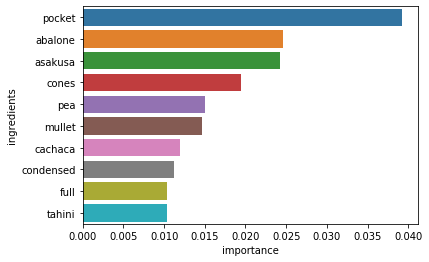

In [0]:
# feature importances
df_imp = pd.DataFrame({"ingredients":X_colname, "importance":xgbgs2.best_estimator_.feature_importances_})
df_imp = df_imp.sort_values(by="importance",ascending=False)
df_imp = df_imp[:10]
sns.barplot(x="importance",y="ingredients",data=df_imp)

In [0]:
# Classify test dataset and make a csv file to submit
test = pd.read_json("test.json",encoding="utf-8", orient='records')
test_ingredients_text = test["ingredients"].apply(lambda x: ' '.join(i.lower() for i in x)).str.replace('[^\w\s]','')
test_x = vectorizer.transform(test_ingredients_text)
sub = pd.DataFrame({'id': test["id"], 'cuisine': lb.inverse_transform(xgbgs2.predict(test_x))})
sub.to_csv('submission.csv', index=False)

## Weighted Ingredient Plotting

In [0]:
weight_data = []
for it in range(len(lr.classes_)):
    sorted_ind = np.argsort(lr.coef_[it])
    print("------ Weights importance for ", lr.classes_[it],"------")
    for i in range(1, 11):
        print(ingredients[sorted_ind[-i]], " with weights ", lr.coef_[it][sorted_ind[-i]])
        weight_data.append([lr.classes_[it],ingredients[sorted_ind[-i]],lr.coef_[it][sorted_ind[-i]]])
    print("")

------ Weights importance for  brazilian ------
cachaca  with weights  5.449643221969179
manioc flour  with weights  3.599558496137029
tapioca flour  with weights  3.112503960576483
sweetened condensed milk  with weights  3.106926186437871
dried black beans  with weights  2.966461202753759
tapioca starch  with weights  2.7767407702576072
hearts of palm  with weights  2.581053081582175
chocolate sprinkles  with weights  2.3933710174670684
açai  with weights  2.2453540559101293
black beans  with weights  2.171307305234213

------ Weights importance for  british ------
stilton  with weights  3.4039011160255184
stilton cheese  with weights  3.260524331351025
mincemeat  with weights  2.7546392156251014
marmite  with weights  2.3845358786374584
double cream  with weights  2.340550694456936
suet  with weights  2.2140315641868105
raspberry jam  with weights  2.1434349745040193
strawberry jam  with weights  2.035611189934053
beef drippings  with weights  2.0318354849493208
beef tenderloin  with

In [0]:
df_weight = pd.DataFrame(weight_data, columns =['cuisine', 'ingredients','weights']) 
df_weight

cuisine               ingredients   weights
0     brazilian                   cachaca  5.449643
1     brazilian              manioc flour  3.599558
2     brazilian             tapioca flour  3.112504
3     brazilian  sweetened condensed milk  3.106926
4     brazilian         dried black beans  2.966461
..          ...                       ...       ...
195  vietnamese                rice paper  2.075903
196  vietnamese                star anise  1.843941
197  vietnamese      Vietnamese coriander  1.767781
198  vietnamese                rice flour  1.608113
199  vietnamese                mung beans  1.596497

[200 rows x 3 columns]

In [0]:
def weight_pie(cuisine_type):
    # get the ingredient weight of each cuisine
    ingredient_weight = df_weight.loc[df_weight['cuisine'] == cuisine_type]

    # plot the pie chart
    ingredient_weight[['ingredients', 'weights']].plot.pie(y='weights', figsize=(8,8), legend=False, autopct='%1.2f%%',
                                                  labels = ingredient_weight['ingredients'],
                                                  colors = ['#FFCD40','#EBE518','#D3E769','#A9DC32','#6DCE57',
                                                            '#21A884','#5DBCA6','#339095','#4b8e8d','#407088'])

    # delete the y_label
    plt.axes().set_ylabel('')

In [0]:
df.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

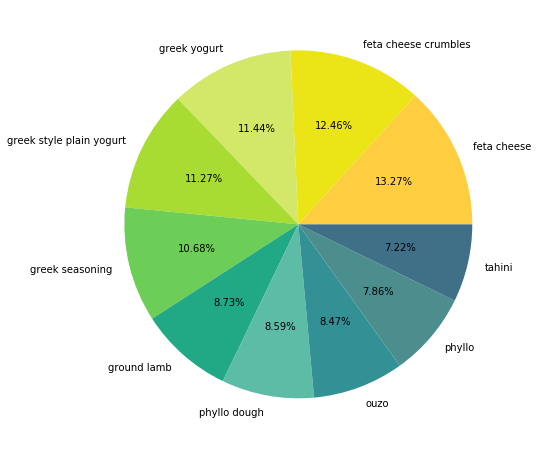

In [0]:
# greek 
pie_greek = weight_pie('greek')
pie_greek

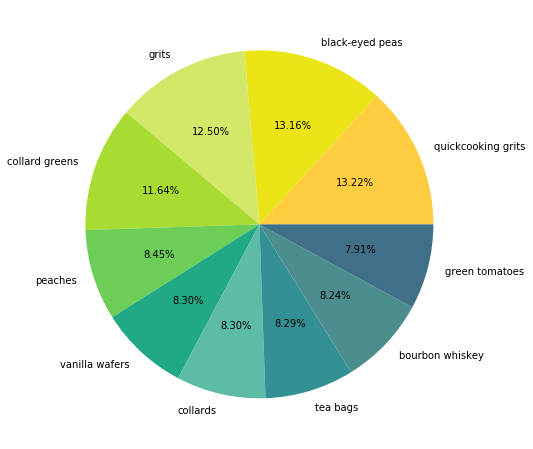

In [0]:
# southern_us
pie_southern_us = weight_pie('southern_us')
pie_southern_us

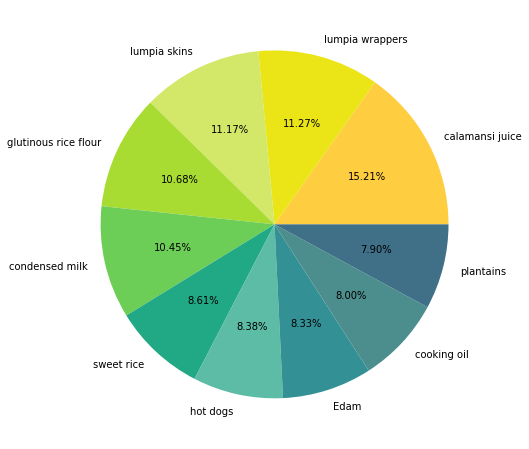

In [0]:
# filipino
pie_filipino = weight_pie('filipino')
pie_filipino

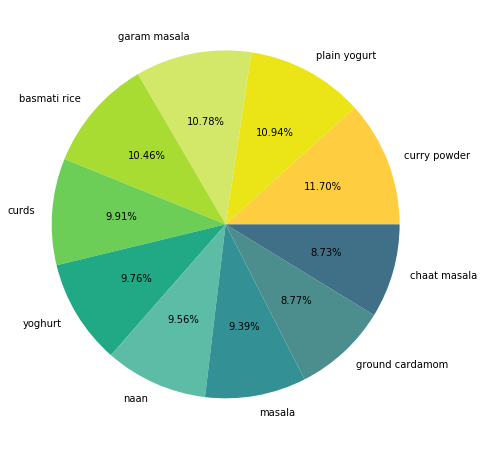

In [0]:
# indian
pie_indian = weight_pie('indian')
pie_indian

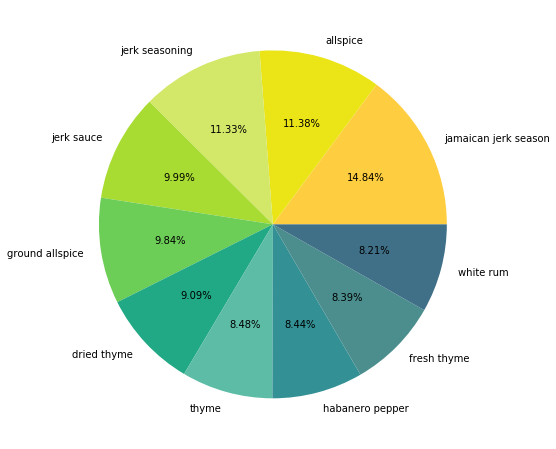

In [0]:
# jamaican
pie_jamaican = weight_pie('jamaican')
pie_jamaican

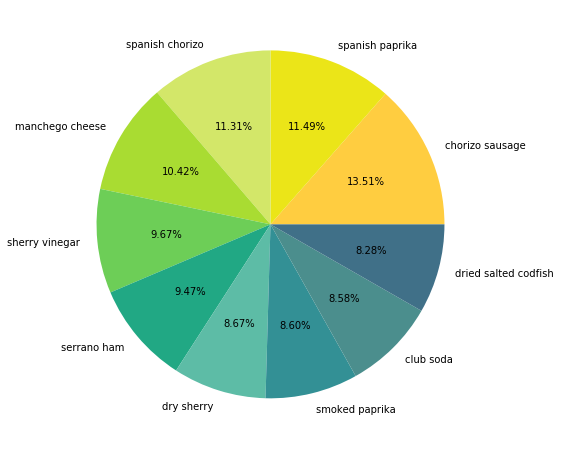

In [0]:
# spanish
pie_spanish = weight_pie('spanish')
pie_spanish

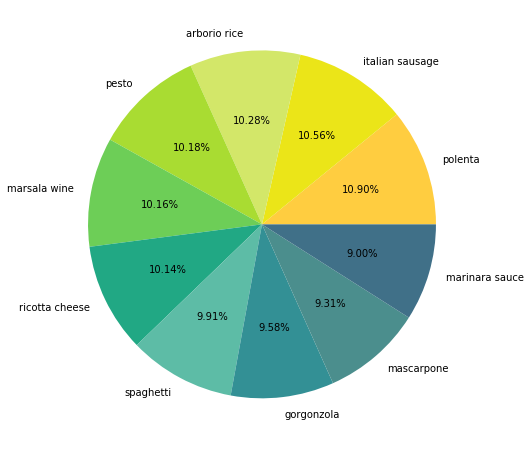

In [0]:
# italian
pie_italian = weight_pie('italian')
pie_italian

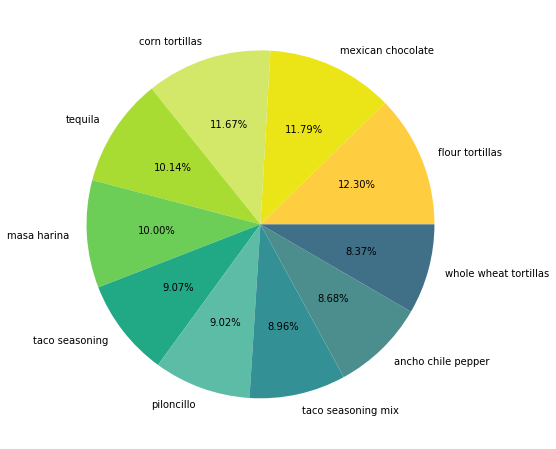

In [0]:
# mexican
pie_mexican = weight_pie('mexican')
pie_mexican

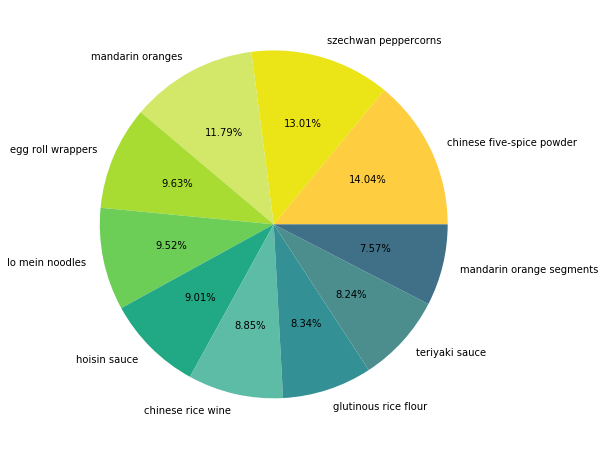

In [0]:
# chinese
pie_chinese = weight_pie('chinese')
pie_chinese

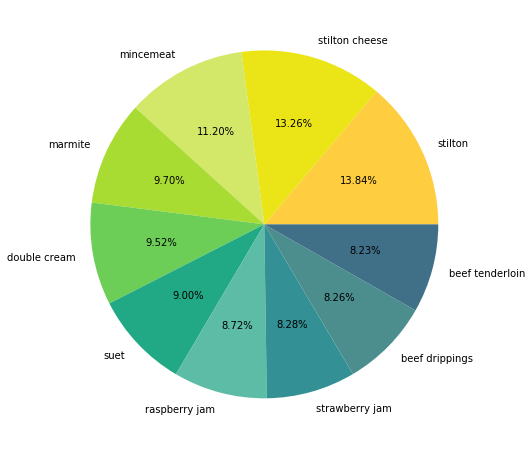

In [0]:
# british
pie_british = weight_pie('british')
pie_british

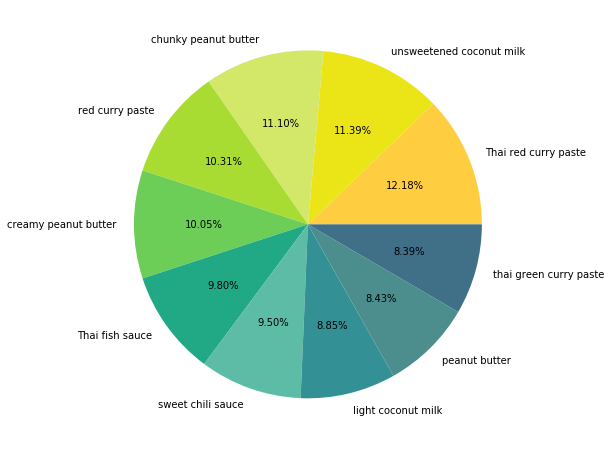

In [0]:
# thai
pie_thai = weight_pie('thai')
pie_thai

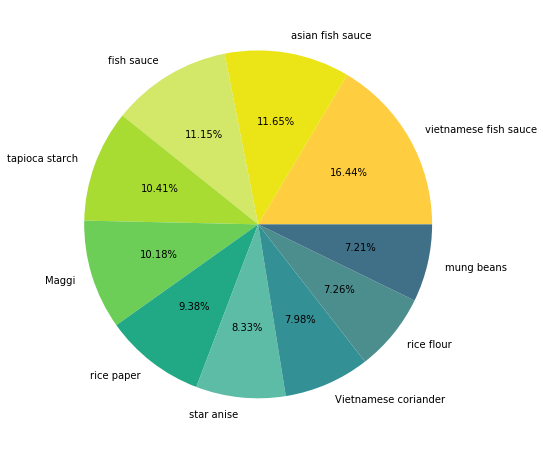

In [0]:
# vietnamese
pie_vietnamese = weight_pie('vietnamese')
pie_vietnamese

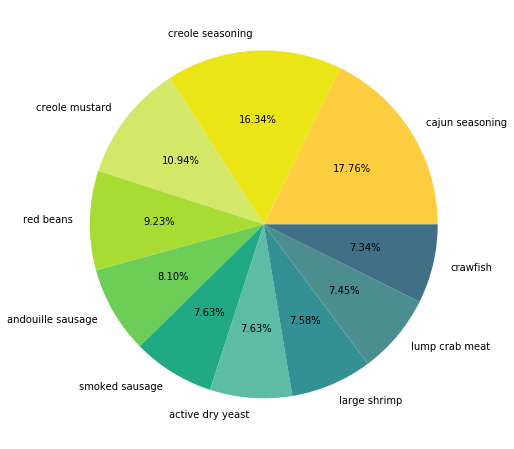

In [0]:
# cajun_creole
pie_cajun_creole = weight_pie('cajun_creole')
pie_cajun_creole

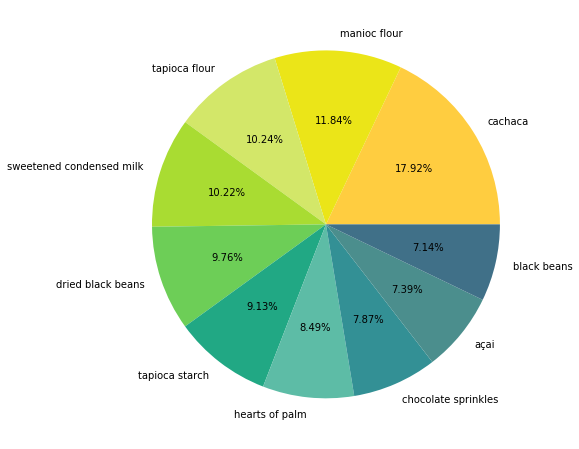

In [0]:
# brazilian
pie_brazilian = weight_pie('brazilian')
pie_brazilian

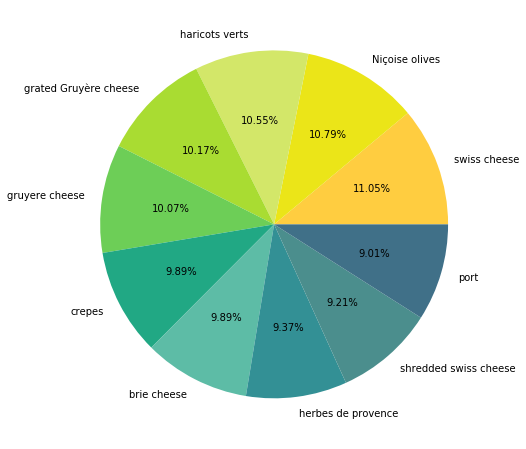

In [0]:
# french
pie_french = weight_pie('french')
pie_french

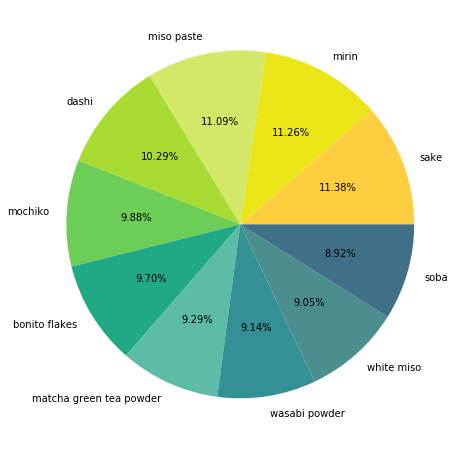

In [0]:
# japanese
pie_japanese = weight_pie('japanese')
pie_japanese

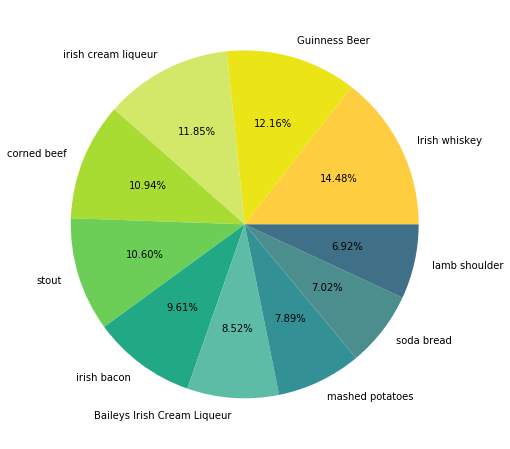

In [0]:
# irish
pie_irish = weight_pie('irish')
pie_irish

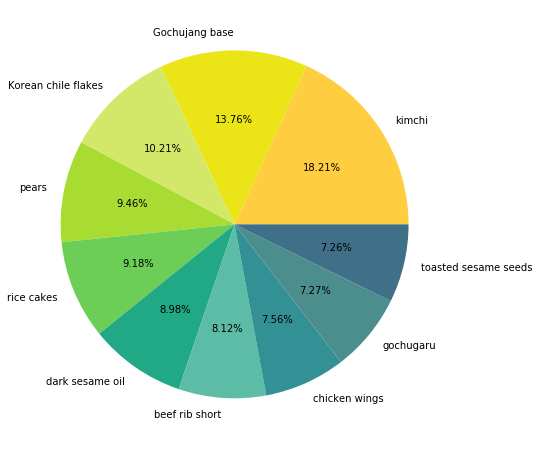

In [0]:
# korean
pie_korean = weight_pie('korean')
pie_korean

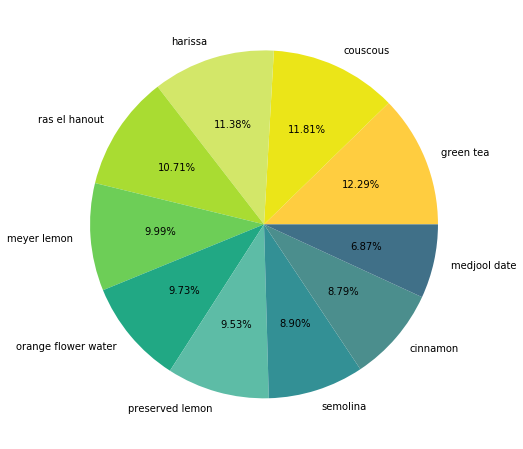

In [0]:
# moroccan
pie_moroccan = weight_pie('moroccan')
pie_moroccan

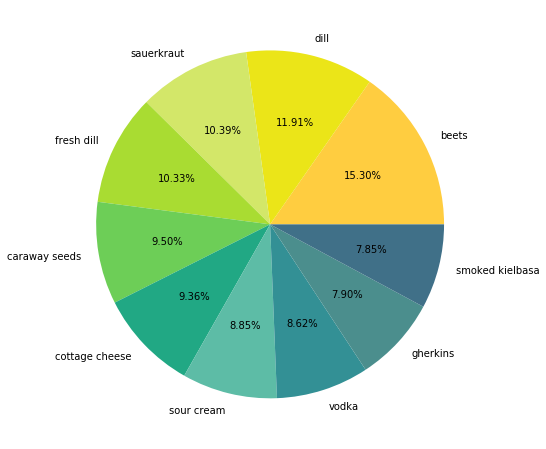

In [0]:
# russian
pie_russian = weight_pie('russian')
pie_russian